In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
# Read the dataset
crop = pd.read_csv("Crop_recommendation.csv")



In [31]:
# Check the first 5 rows
print(crop.head())



    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [32]:
# Check the last 5 rows
print(crop.tail())


        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [33]:

# Check the shape of the dataset
print(crop.shape)


(2200, 8)


In [34]:

# Check the information of the dataset
print(crop.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [35]:

# Check for missing values
print(crop.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [36]:

# Check for duplicate rows
print(crop.duplicated().sum())


0


In [37]:

# Select only numeric columns
crop_numeric_columns = crop.select_dtypes(include=['number']).columns


In [38]:

# Find negative values in all numeric columns
negative_values = crop[(crop[crop_numeric_columns] < 0).any(axis=1)]
print("Rows with negative values in any numeric column:")
print(negative_values)


Rows with negative values in any numeric column:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [39]:

# Drop non-numeric columns
non_numeric_cols = crop.select_dtypes(exclude=[np.number]).columns
crop_numeric = crop.drop(columns=non_numeric_cols)


In [40]:

# Calculate the correlation matrix
corr_matrix = crop_numeric.corr()


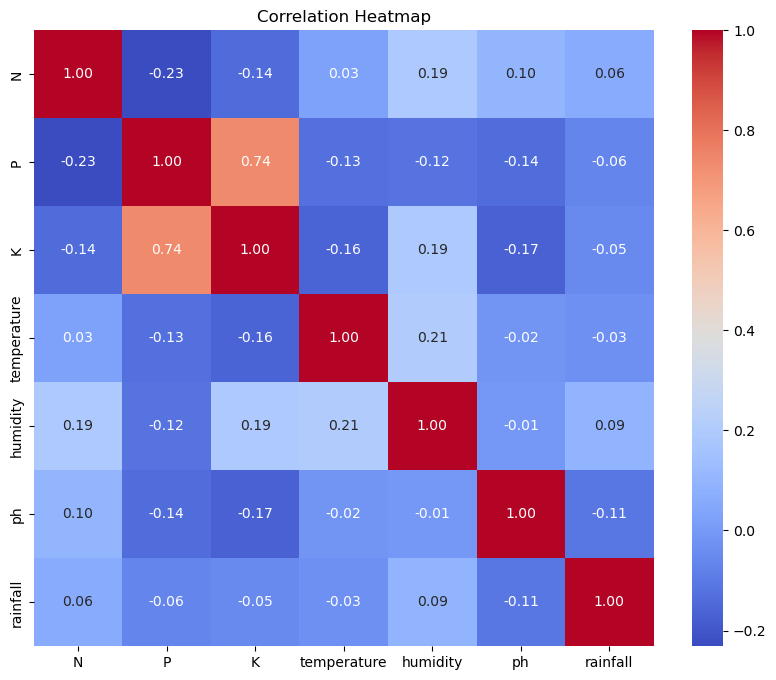

In [41]:

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [42]:

# Check the distribution of target labels
print(crop['label'].value_counts())



label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


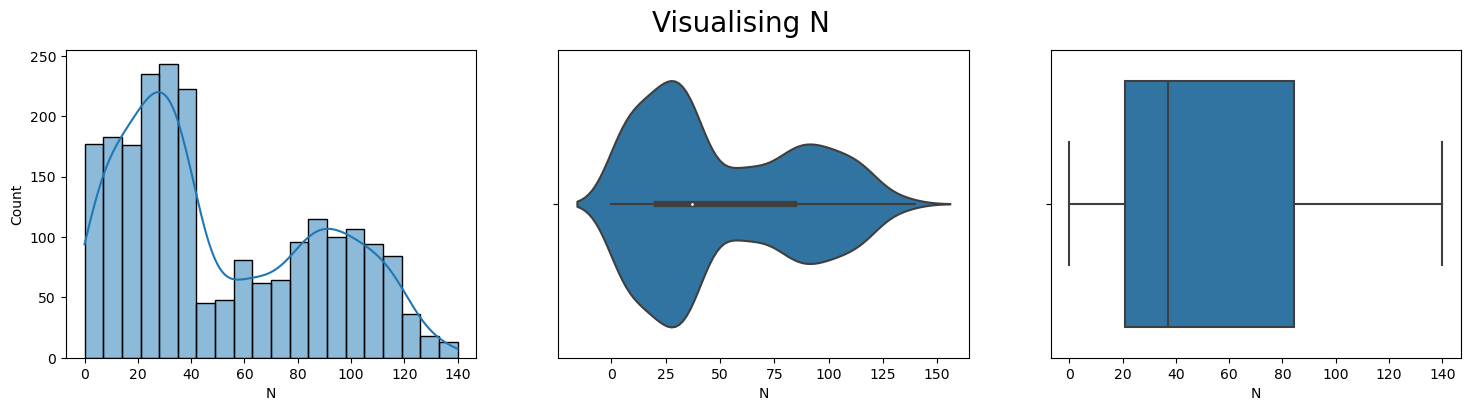

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


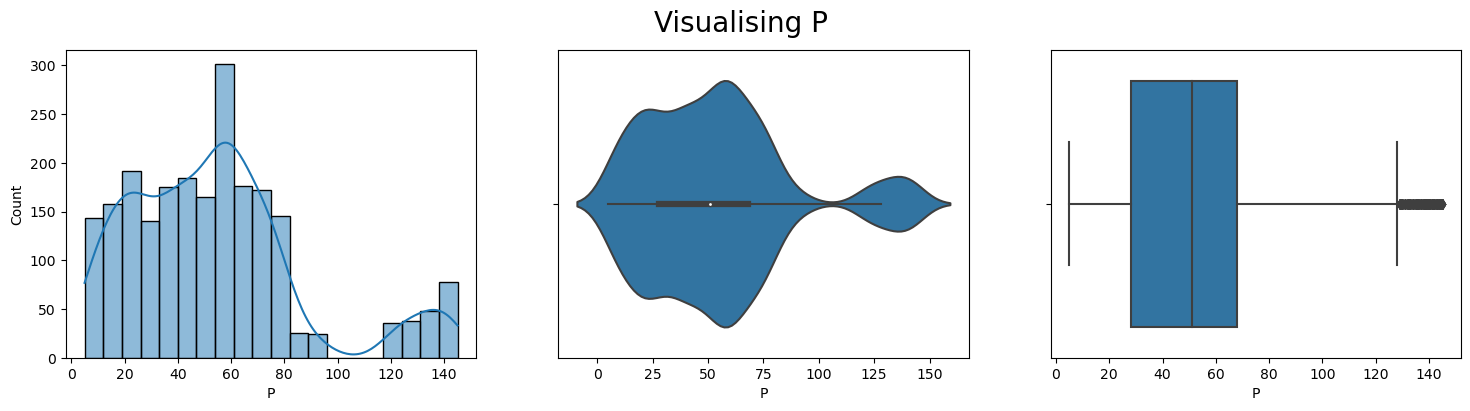

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


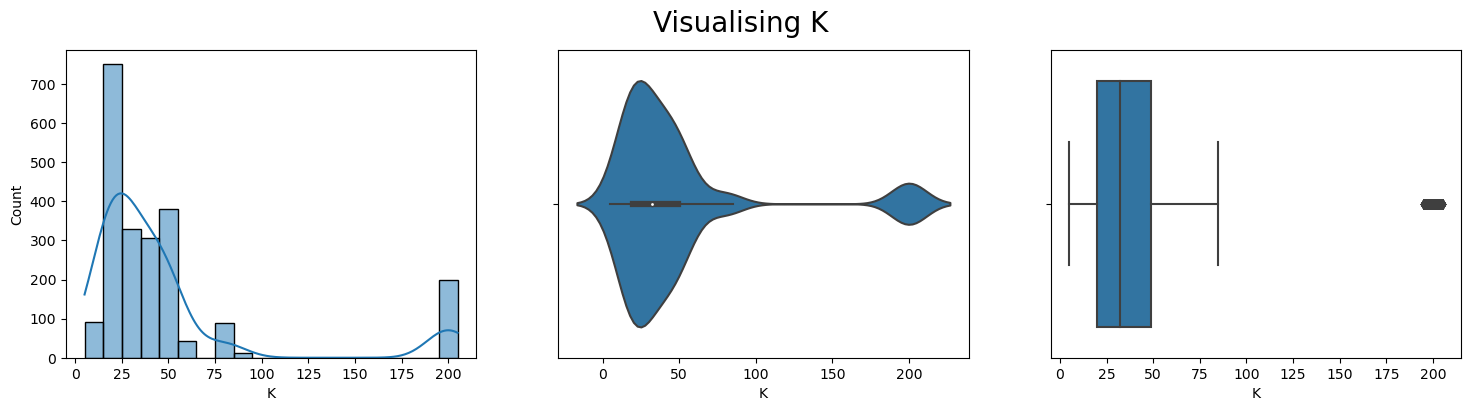

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


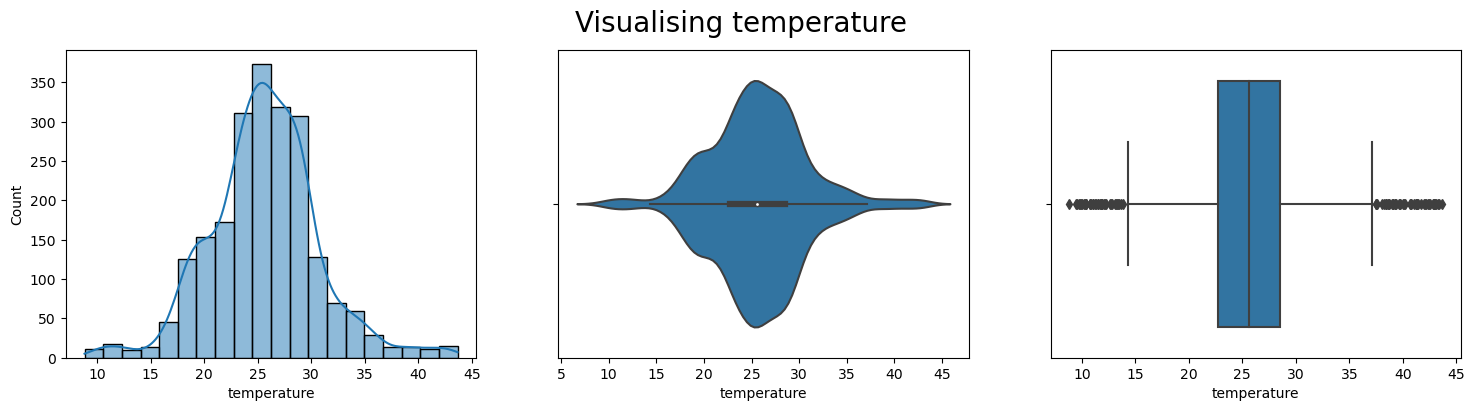

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


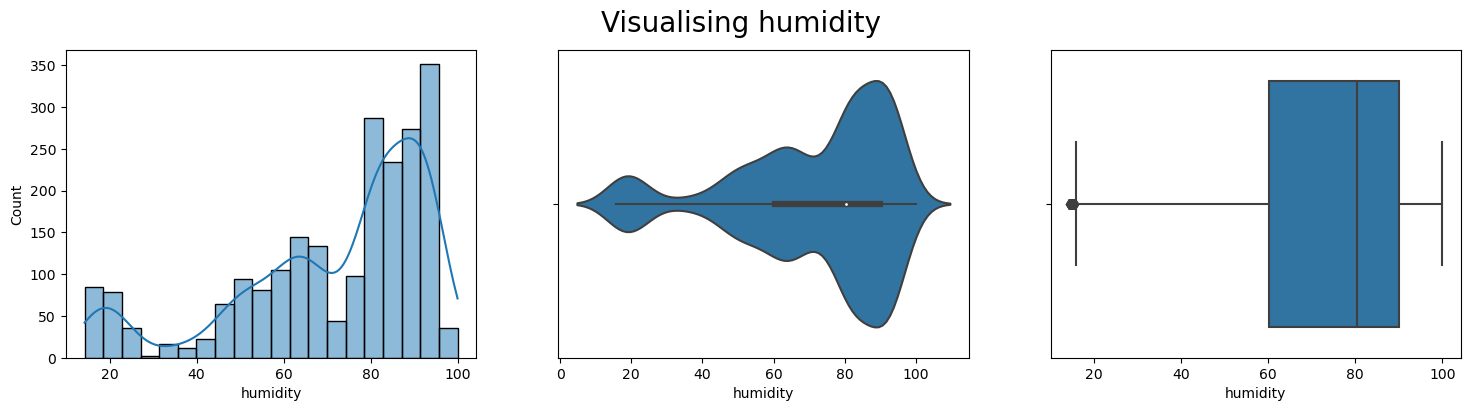

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


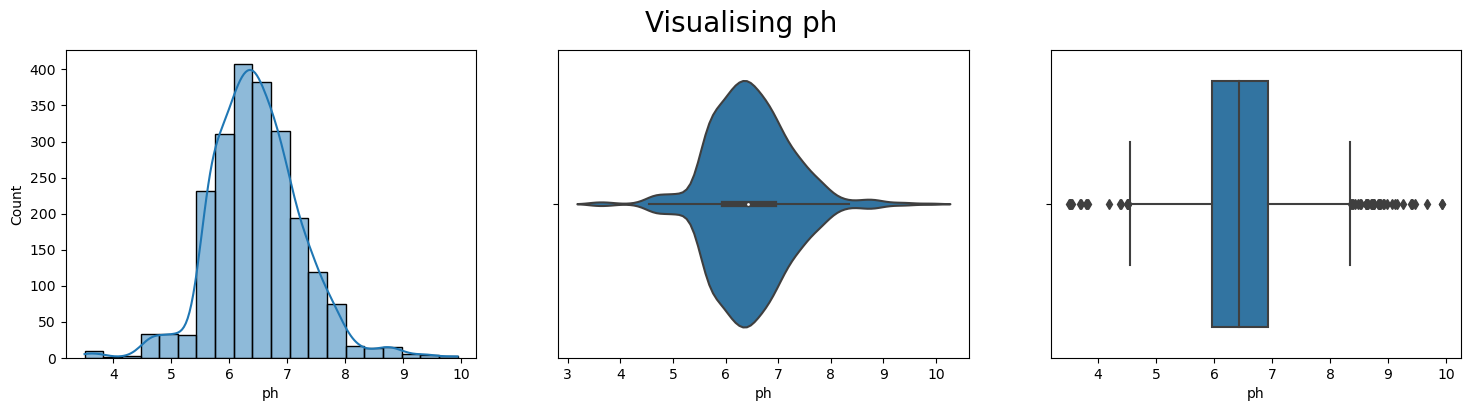

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


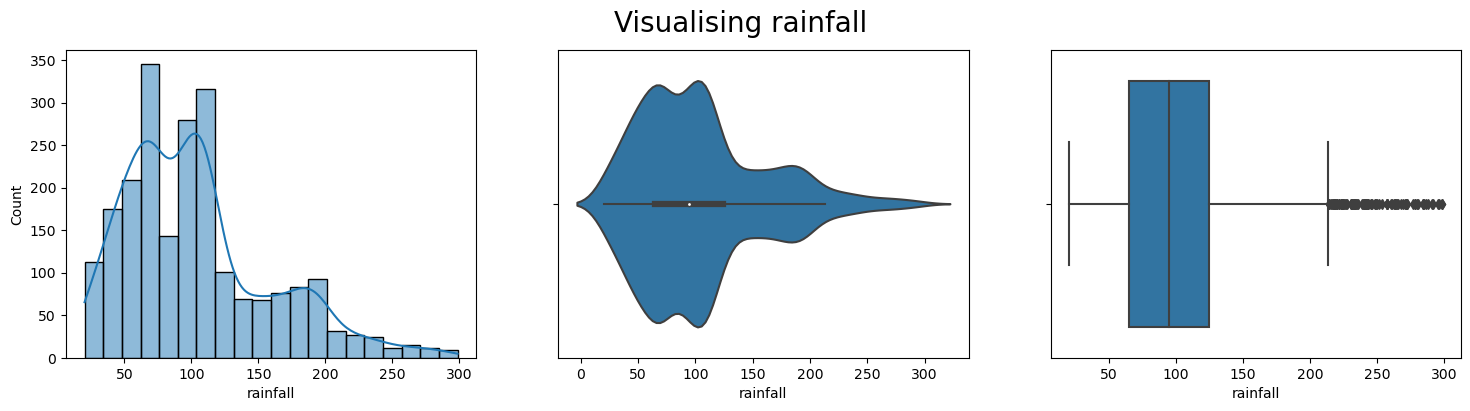

In [43]:
# Visualize the distribution of numerical features
for col in crop.columns[:-1]:
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(data=crop, x=col, kde=True, bins=20, ax=ax[0])
    sns.violinplot(data=crop, x=col, ax=ax[1])
    sns.boxplot(data=crop, x=col, ax=ax[2])
    plt.suptitle(f'Visualising {col}', size=20)
    plt.show()



In [44]:
# Group by crop type and calculate mean agricultural parameters
grouped = crop.groupby(by='label').mean().reset_index()
print(grouped)


          label       N       P       K  temperature   humidity        ph  \
0         apple   20.80  134.22  199.89    22.630942  92.333383  5.929663   
1        banana  100.23   82.01   50.05    27.376798  80.358123  5.983893   
2     blackgram   40.02   67.47   19.24    29.973340  65.118426  7.133952   
3      chickpea   40.09   67.79   79.92    18.872847  16.860439  7.336957   
4       coconut   21.98   16.93   30.59    27.409892  94.844272  5.976562   
5        coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308   
6        cotton  117.77   46.24   19.56    23.988958  79.843474  6.912675   
7        grapes   23.18  132.53  200.11    23.849575  81.875228  6.025937   
8          jute   78.40   46.86   39.99    24.958376  79.639864  6.732778   
9   kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
10       lentil   18.77   68.36   19.41    24.509052  64.804785  6.927932   
11        maize   77.76   48.44   19.79    22.389204  65.092249  6.245190   

In [45]:

# Define the features (X) and target (y)
X = crop.drop(columns=['label'])
y = crop['label']


In [46]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:

# Define and fit the MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:

# Initialize and train the Random Forest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test_scaled)


In [49]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9931818181818182


In [50]:

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

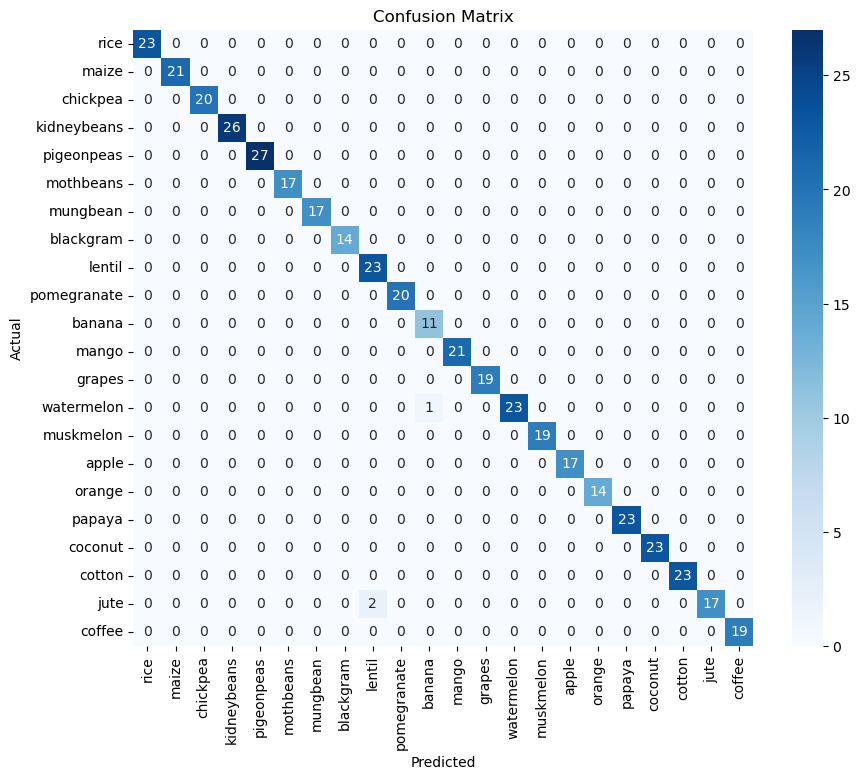

In [51]:

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=crop['label'].unique(), yticklabels=crop['label'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [52]:

# Define the recommendation function
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Scale the input parameters
    features = scaler.transform([[N, P, K, temperature, humidity, ph, rainfall]])
    # Make prediction using the trained model
    prediction = model_rf.predict(features)
    return prediction[0]


In [53]:
# Example usage of the recommendation function
N = 107
P = 34
K = 32
temperature = 56
humidity = 66
ph = 6.6
rainfall = 127
predicted_crop = recommendation(N, P, K, temperature, humidity, ph, rainfall)
print("Recommended crop:", predicted_crop)


Recommended crop: coffee


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
